<a href="https://colab.research.google.com/github/Mayank1325/HealthCare/blob/main/Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/police_department_data.csv')

In [3]:
df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200583e+13,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200583e+13,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410593e+13,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600137e+13,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,1.600027e+13,"(37.7650501214668, -122.419671780296)"


In [42]:
df.isnull().any().sum()

9

In [43]:
df.drop_duplicates()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,year,month,day
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200583e+13,"(37.775420706711, -122.403404791479)",2016.0,1.0,29.0
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200583e+13,"(37.775420706711, -122.403404791479)",2016.0,1.0,29.0
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410593e+13,"(37.7299809672996, -122.388856204292)",2016.0,4.0,25.0
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600137e+13,"(37.7857883766888, -122.412970537591)",2016.0,1.0,5.0
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,1.600027e+13,"(37.7650501214668, -122.419671780296)",2016.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12671,160346463,OTHER OFFENSES,TRAFFIC VIOLATION,2016-04-28 04:48:00,MISSION,"ARREST, BOOKED",2000 Block of MISSION ST,1.603465e+13,"(37.7642205603745, -122.41965834371)",2016.0,4.0,28.0
12672,161025006,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",2016-12-17 22:20:00,RICHMOND,NONE,600 Block of 15TH AV,1.610250e+13,"(37.7758455132356, -122.473560169469)",2016.0,12.0,17.0
12673,160346554,OTHER OFFENSES,INDECENT EXPOSURE,2016-04-28 06:47:00,NORTHERN,"ARREST, BOOKED",3600 Block of BUCHANAN ST,1.603466e+13,"(37.8035632063923, -122.433359859623)",2016.0,4.0,28.0
12674,160346560,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,2016-04-28 07:13:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,1.603466e+13,"(37.7626702770872, -122.435187699349)",2016.0,4.0,28.0


In [4]:
df.shape

(12676, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12676 entries, 0 to 12675
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   incident_id          12676 non-null  int64  
 1   category             12676 non-null  object 
 2   crime_description    12676 non-null  object 
 3   crime_date           12675 non-null  object 
 4   department_district  12675 non-null  object 
 5   resolution           12675 non-null  object 
 6   address              12675 non-null  object 
 7   department_id        12675 non-null  float64
 8   location             12675 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 891.4+ KB


In [6]:
df.category.value_counts().iloc[:10]

LARCENY/THEFT     1958
OTHER OFFENSES    1898
NON-CRIMINAL      1629
ASSAULT           1405
WARRANTS           700
VEHICLE THEFT      669
VANDALISM          598
SUSPICIOUS OCC     569
BURGLARY           567
DRUG/NARCOTIC      491
Name: category, dtype: int64

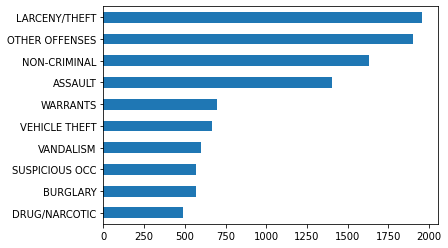

In [7]:
df.category.value_counts().iloc[:10].sort_values().plot(kind='barh')

In [13]:
larceny=df[df['category'].str.contains('LARCENY')]

In [14]:
larceny.shape

(1958, 9)

In [15]:
larceny.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,2016-01-29 22:30:00,TARAVAL,NONE,1200 Block of 19TH AV,1.600869e+13,"(37.7644781578695, -122.477376524003)"
19,160004837,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-01-02 17:39:00,SOUTHERN,JUVENILE BOOKED,900 Block of MARKET ST,1.600048e+13,"(37.7835699386918, -122.408421116922)"
32,160138652,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-02-16 12:40:00,INGLESIDE,NONE,3300 Block of MISSION ST,1.601387e+13,"(37.7435550542265, -122.421128029505)"
42,160010505,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-04 19:40:00,MISSION,NONE,2300 Block of 16TH ST,1.600105e+13,"(37.7657184395282, -122.409529913278)"
61,160012028,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-05 14:00:00,PARK,NONE,DIVISADERO ST / HAYES ST,1.600120e+13,"(37.7749912944366, -122.437799703468)"


In [16]:
larceny.groupby('address').size().sort_values(ascending = False)

address
800 Block of MARKET ST          62
800 Block of BRYANT ST          40
100 Block of OFARRELL ST        18
500 Block of JOHNFKENNEDY DR    18
900 Block of MARKET ST          17
                                ..
6TH AV / LINCOLN WY              1
6TH ST / BRYANT ST               1
6TH ST / HARRISON ST             1
6TH ST / MARKET ST               1
3RD ST / MINNA ST                1
Length: 1296, dtype: int64

In [20]:
larceny.groupby('crime_description').size().sort_values(ascending = False)

crime_description
GRAND THEFT FROM LOCKED AUTO                               491
PETTY THEFT FROM LOCKED AUTO                               367
PETTY THEFT SHOPLIFTING                                    185
PETTY THEFT FROM A BUILDING                                180
GRAND THEFT FROM PERSON                                    159
GRAND THEFT FROM A BUILDING                                113
GRAND THEFT PICKPOCKET                                      94
PETTY THEFT OF PROPERTY                                     75
PETTY THEFT FROM UNLOCKED AUTO                              43
PETTY THEFT BICYCLE                                         38
GRAND THEFT FROM UNLOCKED AUTO                              33
LOST PROPERTY, PETTY THEFT                                  23
GRAND THEFT BICYCLE                                         22
GRAND THEFT SHOPLIFTING                                     21
GRAND THEFT OF PROPERTY                                     20
ATTEMPTED THEFT FROM LOCKED VEHICLE  

In [22]:
larceny.groupby('resolution').size().sort_values(ascending = False)

resolution
NONE                     1746
ARREST, BOOKED            194
JUVENILE BOOKED            13
UNFOUNDED                   3
EXCEPTIONAL CLEARANCE       1
ARREST, CITED               1
dtype: int64

In [28]:
larceny['year'] = pd.DatetimeIndex(larceny['crime_date']).year
larceny.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,year
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,2016-01-29 22:30:00,TARAVAL,NONE,1200 Block of 19TH AV,1.600869e+13,"(37.7644781578695, -122.477376524003)",2016
19,160004837,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-01-02 17:39:00,SOUTHERN,JUVENILE BOOKED,900 Block of MARKET ST,1.600048e+13,"(37.7835699386918, -122.408421116922)",2016
32,160138652,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-02-16 12:40:00,INGLESIDE,NONE,3300 Block of MISSION ST,1.601387e+13,"(37.7435550542265, -122.421128029505)",2016
42,160010505,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-04 19:40:00,MISSION,NONE,2300 Block of 16TH ST,1.600105e+13,"(37.7657184395282, -122.409529913278)",2016
61,160012028,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-05 14:00:00,PARK,NONE,DIVISADERO ST / HAYES ST,1.600120e+13,"(37.7749912944366, -122.437799703468)",2016


In [30]:
larceny['month'] = pd.DatetimeIndex(larceny['crime_date']).month
larceny.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,year,day,month
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,2016-01-29 22:30:00,TARAVAL,NONE,1200 Block of 19TH AV,1.600869e+13,"(37.7644781578695, -122.477376524003)",2016,29,1
19,160004837,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-01-02 17:39:00,SOUTHERN,JUVENILE BOOKED,900 Block of MARKET ST,1.600048e+13,"(37.7835699386918, -122.408421116922)",2016,2,1
32,160138652,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-02-16 12:40:00,INGLESIDE,NONE,3300 Block of MISSION ST,1.601387e+13,"(37.7435550542265, -122.421128029505)",2016,16,2
42,160010505,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-04 19:40:00,MISSION,NONE,2300 Block of 16TH ST,1.600105e+13,"(37.7657184395282, -122.409529913278)",2016,4,1
61,160012028,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-05 14:00:00,PARK,NONE,DIVISADERO ST / HAYES ST,1.600120e+13,"(37.7749912944366, -122.437799703468)",2016,5,1


In [29]:
larceny['day'] = pd.DatetimeIndex(larceny['crime_date']).day
larceny.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,year,day
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,2016-01-29 22:30:00,TARAVAL,NONE,1200 Block of 19TH AV,1.600869e+13,"(37.7644781578695, -122.477376524003)",2016,29
19,160004837,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-01-02 17:39:00,SOUTHERN,JUVENILE BOOKED,900 Block of MARKET ST,1.600048e+13,"(37.7835699386918, -122.408421116922)",2016,2
32,160138652,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-02-16 12:40:00,INGLESIDE,NONE,3300 Block of MISSION ST,1.601387e+13,"(37.7435550542265, -122.421128029505)",2016,16
42,160010505,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-04 19:40:00,MISSION,NONE,2300 Block of 16TH ST,1.600105e+13,"(37.7657184395282, -122.409529913278)",2016,4
61,160012028,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-05 14:00:00,PARK,NONE,DIVISADERO ST / HAYES ST,1.600120e+13,"(37.7749912944366, -122.437799703468)",2016,5


In [31]:
larceny.groupby('year').size().sort_values(ascending = False)

year
2016    1958
dtype: int64

In [32]:
larceny.groupby('month').size().sort_values(ascending = False)

month
3     564
4     453
2     427
1     349
7      31
10     25
9      24
11     23
5      18
8      17
12     16
6      11
dtype: int64

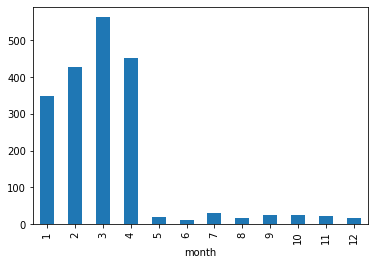

In [35]:
larceny.groupby('month').size().plot(kind = 'bar')

In [33]:
larceny.groupby('day').size().sort_values(ascending = False)

day
26    91
23    87
18    84
11    78
20    73
16    72
7     71
22    70
5     69
17    69
19    68
8     68
24    66
29    66
15    63
2     62
21    61
14    61
13    61
1     59
27    59
10    57
25    56
3     56
12    54
30    54
28    49
9     48
6     48
4     46
31    32
dtype: int64

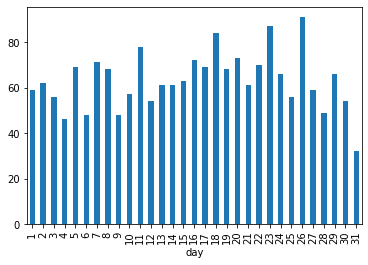

In [34]:
larceny.groupby('day').size().plot(kind = 'bar')

In [36]:
larceny['hour'] = pd.DatetimeIndex(larceny['crime_date']).hour
larceny.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,year,day,month,hour
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,2016-01-29 22:30:00,TARAVAL,NONE,1200 Block of 19TH AV,1.600869e+13,"(37.7644781578695, -122.477376524003)",2016,29,1,22
19,160004837,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-01-02 17:39:00,SOUTHERN,JUVENILE BOOKED,900 Block of MARKET ST,1.600048e+13,"(37.7835699386918, -122.408421116922)",2016,2,1,17
32,160138652,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,2016-02-16 12:40:00,INGLESIDE,NONE,3300 Block of MISSION ST,1.601387e+13,"(37.7435550542265, -122.421128029505)",2016,16,2,12
42,160010505,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-04 19:40:00,MISSION,NONE,2300 Block of 16TH ST,1.600105e+13,"(37.7657184395282, -122.409529913278)",2016,4,1,19
61,160012028,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2016-01-05 14:00:00,PARK,NONE,DIVISADERO ST / HAYES ST,1.600120e+13,"(37.7749912944366, -122.437799703468)",2016,5,1,14


In [37]:
larceny.groupby('hour').size().sort_values(ascending = False)

hour
17    158
19    148
18    147
15    139
20    131
12    131
14    124
16    123
13    122
11    112
21     81
10     81
22     80
9      63
23     56
8      55
1      48
0      45
7      30
5      23
2      17
6      16
4      16
3      12
dtype: int64

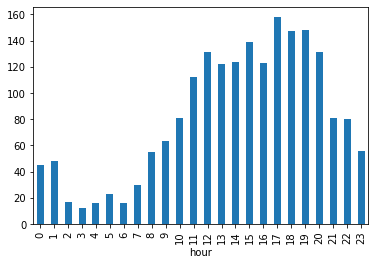

In [39]:
larceny.groupby('hour').size().plot(kind = 'bar')